In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
os.listdir('../input')

['final_test_data.csv', 'final_train_data.csv']

In [3]:
df_train = pd.read_csv('../input/final_train_data.csv',index_col=False)
df_test = pd.read_csv('../input/final_test_data.csv',index_col=False)

In [4]:
df_test = df_test[['Country Name','Country Code','Year','Inflation','GDP','Exports',
                     'Trade']]
df_test.head()

,Country Name,Country Code,Year,Inflation,GDP,Exports,Trade
0,Cyprus,CYP,2001,3.657166,3.600665,9.760000e+08,46.359979
1,Benin,BEN,1995,15.099452,6.045199,4.200000e+08,53.726740
2,Bangladesh,BGD,1995,7.144939,5.121278,3.501000e+09,26.871554
3,Paraguay,PRY,1978,9.706191,12.028730,2.569700e+08,27.230654
4,Morocco,MAR,1987,3.014808,-0.325004,2.826000e+09,32.418633


In [5]:
df_train = df_train[['Country Name','Country Code','Year','Balance','Inflation','GDP','Exports',
                     'Trade']]
df_train.head()

,Country Name,Country Code,Year,Balance,Inflation,GDP,Exports,Trade
0,Senegal,SEN,1983,-3.043829e+08,9.274213,-5.326393,6.180000e+08,59.224298
1,Togo,TGO,2009,-1.766692e+08,1.855275,3.510297,9.030260e+08,76.242542
2,Pakistan,PAK,1992,-1.876092e+09,10.057085,7.705898,7.351000e+09,34.489440
3,Nepal,NPL,1988,-2.714506e+08,11.815310,7.696809,1.900000e+08,24.978422
4,Malta,MLT,2016,7.269132e+08,1.604548,5.516617,3.017299e+09,83.781471


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 8 columns):
Country Name    4506 non-null object
Country Code    4506 non-null object
Year            4506 non-null int64
Balance         4506 non-null float64
Inflation       4261 non-null float64
GDP             4262 non-null float64
Exports         4490 non-null float64
Trade           4304 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 281.7+ KB


In [7]:
len(df_train['Country Name'].unique())

150

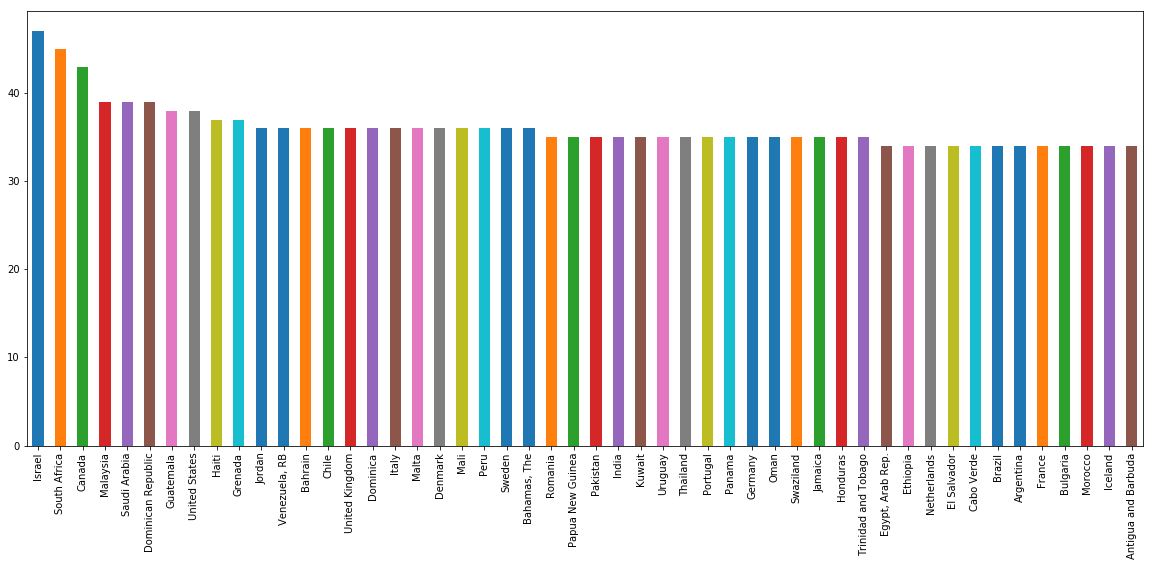

In [8]:
df_train['Country Name'].value_counts()[:50].plot(kind='bar',figsize=(20,8))

Mean balance: -513203070.70703393
Median balance: -160328728.3
STD balance: 35610068572.69368


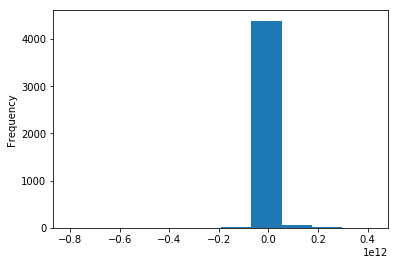

In [9]:
print('Mean balance:',df_train['Balance'].mean())
print('Median balance:',df_train['Balance'].median())
print('STD balance:',df_train['Balance'].std())
df_train['Balance'].plot(kind='hist')

Mean Inflation: 31.613464205125098
Median Inflation: 6.184351239
STD Inflation: 353.81796526229755


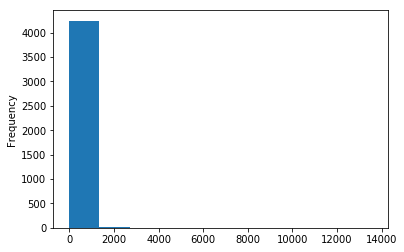

In [10]:
print('Mean Inflation:',df_train['Inflation'].mean())
print('Median Inflation:',df_train['Inflation'].median())
print('STD Inflation:',df_train['Inflation'].std())
df_train['Inflation'].plot(kind='hist')

Mean GDP: 3.6412244918801027
Median GDP: 3.799969259
STD GDP: 4.850977550143861


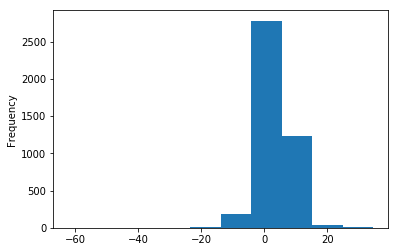

In [11]:
print('Mean GDP:',df_train['GDP'].mean())
print('Median GDP:',df_train['GDP'].median())
print('STD GDP:',df_train['GDP'].std())
df_train['GDP'].plot(kind='hist')

Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
country_name_encoder = LabelEncoder()
country_name_encoder.fit(df_train['Country Name'])

LabelEncoder()

In [14]:
country_name_encoder.transform(df_train['Country Name'])

array([115, 135, 102, ..., 112,  52,  94])

In [15]:
len(country_name_encoder.transform(df_train['Country Name']))

4506

In [16]:
df_train['CountryId'] = country_name_encoder.transform(df_train['Country Name'])

In [17]:
df_train = df_train[['CountryId','Year','Exports','Inflation','GDP','Trade','Balance']]

In [18]:
df_train = df_train.sort_values(by=['CountryId','Year']).reset_index(drop=True)

In [19]:
df_train[df_train['CountryId']==0]

,CountryId,Year,Exports,Inflation,GDP,Trade,Balance
0,0,1981,NaN,-2.177360,5.745635,NaN,4.500000e+07
1,0,1982,NaN,-0.017694,2.948597,NaN,-6.680000e+07
2,0,1983,NaN,-0.016747,1.104938,NaN,-3.830000e+07
3,0,1984,NaN,-0.028354,-1.251597,NaN,-2.810000e+07
4,0,1985,NaN,0.351198,1.780644,NaN,-3.640000e+07
5,0,1986,NaN,-2.378001,5.637243,NaN,-3.200000e+06
6,0,1987,NaN,0.000029,-0.787843,NaN,5.200000e+06
7,0,1988,NaN,0.000001,-1.420040,NaN,-2.710000e+07
8,0,1990,2.300000e+08,-0.468707,-9.575640,29.025160,-1.183000e+08
9,0,1995,2.020000e+08,5.573307,13.300000,37.760378,-1.150000e+07


Impute the missing values

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
df_train.isnull().sum()

CountryId      0
Year           0
Exports       16
Inflation    245
GDP          244
Trade        202
Balance        0
dtype: int64

In [22]:
features=['CountryId','Year','Exports','Inflation','GDP','Trade']
target=['Balance']
X = df_train[features]
y=df_train[target].values.reshape(4506)

In [23]:
imp =SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(X)
X = imp.fit_transform(X)

In [24]:
X.shape,y.shape

((4506, 6), (4506,))

Scaling

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X

array([[-1.75018497e+00, -1.25586014e+00,  5.28823144e-17,
        -9.82222108e-02,  4.46109102e-01,  1.55518298e-16],
       [-1.75018497e+00, -1.17385889e+00,  5.28823144e-17,
        -9.19445543e-02, -1.46828517e-01,  1.55518298e-16],
       [-1.75018497e+00, -1.09185765e+00,  5.28823144e-17,
        -9.19418016e-02, -5.37661359e-01,  1.55518298e-16],
       ...,
       [ 1.71254536e+00,  1.36817964e+00, -2.76485838e-01,
        -8.37375843e-02,  4.00351901e-01, -2.70594647e-01],
       [ 1.71254536e+00,  1.45018088e+00, -2.79559594e-01,
        -8.98557038e-02, -3.20979007e-01, -3.76016506e-01],
       [ 1.71254536e+00,  1.53218212e+00, -2.82052404e-01,
        -8.92826310e-02, -4.13721519e-01, -4.76521941e-01]])

Modeling

In [27]:
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [28]:
random_seed = 2019

In [29]:
X_B,X_val,y_B,y_val = train_test_split(X,y,test_size=0.1,random_state=random_seed)
X_train,X_test,y_train,y_test = train_test_split(X_B,y_B,test_size=0.1,random_state=random_seed)
print(X_B.shape,X_val.shape,y_B.shape,y_val.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4055, 6) (451, 6) (4055,) (451,) (3649, 6) (406, 6) (3649,) (406,)


In [30]:
regressors =[GradientBoostingRegressor(),AdaBoostRegressor()]

In [31]:
np.linspace(0.1,0.2,5)

array([0.1  , 0.125, 0.15 , 0.175, 0.2  ])

In [35]:
np.linspace(0.5, 1.0, 12),

(array([0.5       , 0.54545455, 0.59090909, 0.63636364, 0.68181818,
        0.72727273, 0.77272727, 0.81818182, 0.86363636, 0.90909091,
        0.95454545, 1.        ]),)

In [36]:
regression_params = {
    'GradientBoostingRegressor' : 
    {
        'loss':['huber', 'quantile'],
        'learning_rate':np.linspace(0.1,0.2,5),
        'n_estimators':np.arange(100,300,100),
        'min_samples_split':[0.1,0.3,0.5],
        'min_samples_leaf':[0.1,0.3,0.5],
        'subsample':[0.5,0.7,0.9],
        'max_depth':[5,7,10],
        'max_features':['sqrt'],
        'n_iter_no_change':[3],
        'random_state':[random_seed]
    },
    'AdaBoostRegressor':
    {
        'loss' : ['linear', 'square', 'exponential'],
        'learning_rate':np.linspace(0.1,0.2,5),
        'n_estimators':np.arange(100,300,100),
        'random_state':[random_seed]       
    }    
}

In [38]:
regression_results =[]
for i,reg in enumerate(regressors):
  reg_name = type(reg).__name__
  print(reg_name)
  
  regressor = GridSearchCV(reg,regression_params[reg_name],verbose=1,cv=5,n_jobs=-1)
  regressor.fit(X_train,y_train)
  y_pred_val = regressor.predict(X_val)  
  regression_results.append({'Reg':regressor,
                     'y_pred_val':y_pred_val
                    })

GradientBoostingRegressor
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 2059 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4579 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8100 out of 8100 | elapsed:  4.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


AdaBoostRegressor
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


In [43]:
print(regression_results[0]['Reg'].best_params_)
print(regression_results[1]['Reg'].best_params_)

{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'n_iter_no_change': 3, 'random_state': 2019, 'subsample': 0.9}
{'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100, 'random_state': 2019}


In [44]:
gdc_params ={'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 
             'min_samples_leaf': 0.1, 'min_samples_split': 0.1,'n_estimators': 100, 
             'n_iter_no_change': 3, 'random_state': 2019, 'subsample': 0.9}

ab_params ={'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 100, 'random_state': 2019}

In [72]:
clf = GradientBoostingRegressor(**gdc_params)
clf.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=0.1, min_samples_split=0.1,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=3, presort='auto', random_state=2019,
             subsample=0.9, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [71]:
clf_ab = AdaBoostRegressor(**ab_params)
clf_ab.fit(X,y)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='square',
         n_estimators=100, random_state=2019)

In [48]:
df_test['CountryId'] = country_name_encoder.transform(df_test['Country Name'])

In [50]:
df_test = df_test[['CountryId','Year','Exports','Inflation','GDP','Trade']]

In [52]:
df_test.head()

,CountryId,Year,Exports,Inflation,GDP,Trade
0,32,2001,9.760000e+08,3.657166,3.600665,46.359979
1,15,1995,4.200000e+08,15.099452,6.045199,53.726740
2,11,1995,3.501000e+09,7.144939,5.121278,26.871554
3,105,1978,2.569700e+08,9.706191,12.028730,27.230654
4,92,1987,2.826000e+09,3.014808,-0.325004,32.418633


In [53]:
df_test.isnull().sum()

CountryId    0
Year         0
Exports      0
Inflation    0
GDP          0
Trade        0
dtype: int64

In [55]:
df_test.values.shape

(1071, 6)

In [57]:
X_test = df_test.values
X_test = scaler.fit_transform(X_test)

In [75]:
balance = clf.predict(X_test)

df_out = pd.read_csv('../input/final_test_data.csv',index_col=False)

df_out = df_out[['Country Name','Country Code','Year','Inflation','GDP','Exports','Trade']]

df_out['Balance']=balance

df_out = df_out[['Country Name','Country Code','Year','Balance','Inflation','GDP','Exports','Trade']]
df_out.head()

df_out.to_csv('GD_Submission_01022019.csv',index=False)

In [ ]:
balance_ab = clf_ab.predict(X_test)

df_out = pd.read_csv('../input/final_test_data.csv',index_col=False)

df_out = df_out[['Country Name','Country Code','Year','Inflation','GDP','Exports','Trade']]

df_out['Balance']=balance_ab

df_out = df_out[['Country Name','Country Code','Year','Balance','Inflation','GDP','Exports','Trade']]
df_out.head()

df_out.to_csv('AB_Submission_01022019.csv',index=False)